# Лабораторная работа 3

## Описание модели

Данные содержат 1473 записей и 10 атрибутов. Набор данных является подмножеством Национального обследования распространенности контрацептивов в Индонезии 1987 года. https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

### Attributes 

- Wife's age (numerical) 
- Wife's education (categorical) 1=low, 2, 3, 4=high 
- Husband's education (categorical) 1=low, 2, 3, 4=high 
- Number of children ever born (numerical) 
- Wife's religion (binary) 0=Non-Islam, 1=Islam 
- Wife's now working? (binary) 0=Yes, 1=No
- Husband's occupation (categorical) 1, 2, 3, 4 
- Standard-of-living index (categorical) 1=low, 2, 3, 4=high 
- Media exposure (binary) 0=Good, 1=Not good 
- Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term (будет изменено: 0=No-use, 1=use)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

features = pd.read_csv('cmc.csv')

In [2]:
features.head(5)

,Wife_s age,Wife_s education,Husband_s education,Number of children ever born,Wife_s religion,Wife_s now working?,Husband_s occupation,Standard-of-living index,Media exposure (binary),Contraceptive method used
0,45,1,3,10,1,1,3,4,0,0
1,43,2,3,7,1,1,3,4,0,0
2,42,3,2,9,1,1,3,3,0,0
3,36,3,3,8,1,1,3,2,0,0
4,19,4,4,0,1,1,3,3,0,0


In [3]:
min_ = features.min()
max_ = features.max()
mean_ = features.mean()
std_ = features.std()
nulls = features.isnull().sum()
stats = pd.DataFrame({'Пропуски': nulls, 'Мин.': min_, 'Макс.': max_, 'Средн.': mean_, 'Ст. откл.': std_})
stats

,Пропуски,Мин.,Макс.,Средн.,Ст. откл.
Wife_s age,0,16,49,32.544158,8.227027
Wife_s education,0,1,4,2.959239,1.015031
Husband_s education,0,1,4,3.430027,0.816549
Number of children ever born,0,0,16,3.261549,2.359341
Wife_s religion,0,0,1,0.850543,0.356659
Wife_s now working?,0,0,1,0.749321,0.433552
Husband_s occupation,0,1,4,2.137908,0.865144
Standard-of-living index,0,1,4,3.133832,0.976486
Media exposure (binary),0,0,1,0.074049,0.261939
Contraceptive method used,0,0,1,0.573370,0.494756


In [4]:
X = features.drop('Contraceptive method used', axis=1)
y = features['Contraceptive method used']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [6]:
def plot_confusion_matrix_sns(cm):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    sns.heatmap(cm, annot=True, ax=ax, cmap='GnBu', fmt='g')
    ax.set_ylabel('True', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=12)
    
def print_prediction_assessment(predictions, y):
    test_acc = accuracy_score(y, predictions)
    test_prec = precision_score(y, predictions)
    test_recall = recall_score(y, predictions)
    f1 = (2 * test_prec * test_recall) / (test_prec + test_recall)
    cm = confusion_matrix(y, predictions)
    print('acc =', test_acc, '| prec =', test_prec, '| rec =', test_recall, '| f1 =', f1)
    plot_confusion_matrix_sns(cm)

acc = 0.6522633744855967 | prec = 0.6301969365426696 | rec = 1.0 | f1 = 0.7731543624161074


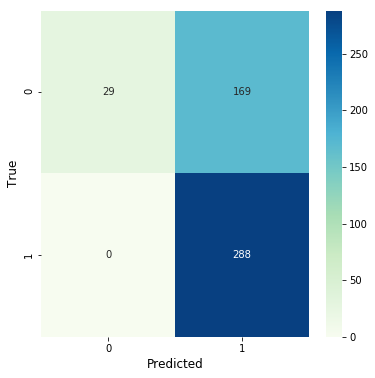

In [7]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=12345)

dt = dt.fit(X_train, y_train)

predictions = dt.predict(X_test)
print_prediction_assessment(predictions, y_test)

acc = 0.6090534979423868 | prec = 0.6689655172413793 | rec = 0.6736111111111112 | f1 = 0.671280276816609


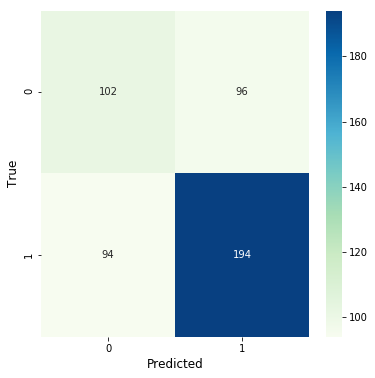

In [8]:
rf = RandomForestClassifier(n_estimators=3, max_depth=None, random_state=100)
rf = rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
print_prediction_assessment(predictions, y_test)

In [9]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

acc = 0.6378600823045267 | prec = 0.6879194630872483 | rec = 0.7118055555555556 | f1 = 0.6996587030716723


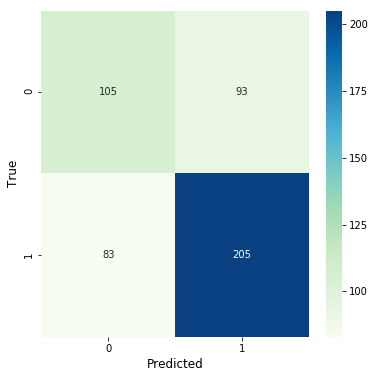

In [10]:
knnc = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
knnc = knnc.fit(X_train, y_train)

predictions = knnc.predict(X_test)
print_prediction_assessment(predictions, y_test)